<a href="https://colab.research.google.com/github/tselane2110/ML-Specialization/blob/main/MultipleLinearRegressionImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: This notebook consists of the implementation of MLR with and without regularization

# 1. Multiple Linear Regression (MLR) without regularization

In [66]:
import numpy as np
import matplotlib.pyplot as plt

class MLR():
  def fit_data(self, x, y):
    '''
    x -> list of training examples (2d array)
    y -> list of actual outputs (1d array)
    m -> number of training examples (int)
    n -> number of features (int)
    w -> list of weights/coefficients of size n  (1d array)
    b -> bias/intercept (int)
    y_hat -> predicted output (1d array)
    cost -> dictionary :
            cost_w -> Contains lists of cost values for each weight w[i] across all iterations.
            cost_b -> Contains cost values for the bias term b across all iterations.
    cost_function -> list containing cost functions for each iteration
    number_of_iterations = min no of times we want our gradient descent to execute/run
    '''
    self.x = x
    self.y = y
    self.m = len(x)
    self.n = x.shape[1]
    self.w = np.zeros(self.n)
    self.b = 0
    self.y_hat = None
    self.cost = {
        'cost_w' : [],
        'cost_b' : []
    }
    self.cost_function = []
    self.number_of_iterations = 70

    # calling recursive GD
    self.recursiveGD()

  def predict(self, x):
    '''
    x -> training/testing data (2d array)
    '''

    y_hat = []
    for i in range(len(x)):
      y_hat.append(np.dot(self.w, x[i]) + self.b)
    return y_hat

  def error_w(self, j):
    error = 0
    for i in range(len(self.y_hat)):
      error += (self.y_hat[i] - self.y[i])*self.x[i][j]
    return error

  def error_b(self):
    error = 0
    for i in range(len(self.y_hat)):
      error += (self.y_hat[i] - self.y[i])
    return error

  def cost_w(self):
    cost_w = []
    for i in range(self.n):
      error = self.error_w(i)
      cost_w.append((1/self.m) * error)
    return cost_w

  def cost_b(self):
    cost_b = (1/self.m) * self.error_b()
    return cost_b

  def cost_function_lc(self):
    result = 0
    error = 0
    for i in range(len(self.y_hat)):
      error = error + ((self.y_hat[i] - self.y[i])**2)
    result = (1/(2*self.m)) * error
    return result

  def plot_learningCurve(self):
    # printing the total number of iterations

    print("total number of iterations: ", len(self.cost_function))
    plt.plot(range(len(self.cost_function)), self.cost_function, label='Learning Curve')  # Plot cost_function vs # of iterations
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function J(w, b)')
    plt.title('Learning Curve ')
    plt.legend()
    plt.show()

  def abs_diff(self, a, b):

    # abs_diff stands for absolute difference
    result = abs(a-b)
    return result

  def stopping_criteria_check(self, threshold):
    '''
    Need to check that the cost function for the last 5 iterations has converged
    Also verifying that we have calculated the cost atleast 10 times, idk for what reason but yea (I do know, i mean that's the min number
    of iterations Im aiming for)
    '''
    cost = self.cost_function

    if len(cost) >= self.number_of_iterations :
      a = self.abs_diff(cost[-1], cost[-2])
      b = self.abs_diff(cost[-2], cost[-3])
      c = self.abs_diff(cost[-3], cost[-4])
      d = self.abs_diff(cost[-4], cost[-5])
      e = self.abs_diff(cost[-5], cost[-1])

      if (a, b, c, d, e <= threshold):
        return 0

    else:
      return 1

  def recursiveGD(self):
    # call the predict function to make predictions on updated weights
    self.y_hat = self.predict(self.x)

    # call the cost function to calculate the cost for the weights and the bias
    self.cost['cost_w'].append(self.cost_w())
    self.cost['cost_b'].append(self.cost_b())

    # calculating cost function to plot our learning curve afterwards
    self.cost_function.append(self.cost_function_lc())

    # call the gradient descent to get the best parameters (weights + bias)
    self.gradient_descent()

  def gradient_descent(self):
    alpha = 0.06
    threshold = 1e-3 # 0.001

    # stopping criteria
    sc = self.stopping_criteria_check(threshold)
    if sc == 0:
      self.plot_learningCurve()
      return

    # updating w
    for i in range(self.n):
      self.w[i] = self.w[i] - alpha * self.cost['cost_w'][-1][i]

    # updating b
    self.b = self.b - alpha * self.cost['cost_b'][-1]

    # calling recursive GD
    self.recursiveGD()



### - Testing MLR

In [67]:
model = MLR()

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Settings for reproducibility and dataset size
np.random.seed(42)
n_samples = 100  # Number of data points
n_features = 5   # Number of features

# Step 1: Generate feature data with random values
X = np.random.rand(n_samples, n_features) * 1000  # Random values from 0 to 10

# Step 2: Define weights and bias for the linear relationship
weights = np.array([1.5, -2.0, 3.0, -4.5, 2.0])  # Example weights
bias = 5  # Example bias term

# Step 3: Create the target variable with a linear combination of features + noise
noise = np.random.randn(n_samples) * 0.5  # Small random noise
y = X.dot(weights) + bias + noise

# Step 4: Scale and normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Combine features and target into a DataFrame
columns = [f"Feature_{i+1}" for i in range(n_features)]
df = pd.DataFrame(X_scaled, columns=columns)
df["Target"] = y

# Display the first few rows of the dataset
print(df.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5       Target
0  -0.439808   1.425870   0.832798   0.265310  -0.971652 -1520.391629
1  -1.178208  -1.565503   1.290222   0.273730   0.828999  1433.418682
2  -1.635718   1.490198   1.175225  -1.058834  -0.887479     1.984108
3  -1.085598  -0.740579   0.126331  -0.306115  -0.530632  -115.691182
4   0.362002  -1.292682  -0.666636  -0.530907   0.007034   783.288033


In [69]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Target' is the name of your target column
X = df.drop('Target', axis=1)  # Features
y = df['Target']                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the resulting sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 80
Testing set size: 20


total number of iterations:  70


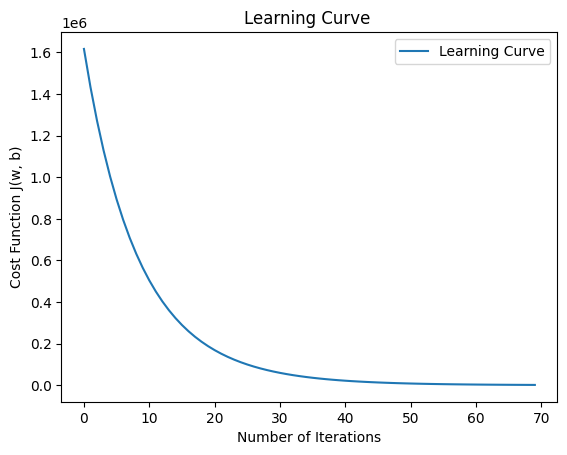

In [70]:
model.fit_data(np.array(X_train), np.array(y_train))

In [71]:
y_hat = model.predict(np.array(X_test))

In [72]:
error = y_hat - y_test
error

,Target
83,-2.158799
53,-23.263949
70,-0.628619
45,72.470155
44,-3.446330
39,31.870718
22,31.557436
80,105.013841
10,-4.887932
0,62.722612


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 2763.27
R^2 Score: 1.00


## 2. Multiple Linear Regression With Regularization (MLR_Reg)

In [74]:
import numpy as np
import matplotlib.pyplot as plt

class MLR_Regularized():
  def fit_data(self, x, y):
    '''
    x -> list of training examples (2d array)
    y -> list of actual outputs (1d array)
    m -> number of training examples (int)
    n -> number of features (int)
    w -> list of weights/coefficients of size n  (1d array)
    b -> bias/intercept (int)
    y_hat -> predicted output (1d array)
    cost -> dictionary :
            cost_w -> Contains lists of cost values for each weight w[i] across all iterations.
            cost_b -> Contains cost values for the bias term b across all iterations.
    cost_function -> list containing cost functions for each iteration
    number_of_iterations = min no of times we want our gradient descent to execute/run
    lmbd -> lambda, hyperparameter for regularization
    '''
    self.x = x
    self.y = y
    self.m = len(x)
    self.n = x.shape[1]
    self.w = np.zeros(self.n)
    self.b = 0
    self.y_hat = None
    self.cost = {
        'cost_w' : [],
        'cost_b' : []
    }
    self.cost_function = []
    self.number_of_iterations = 70
    # hyperparameter lambda
    self.lmbd = 0.007

    # calling recursive GD
    self.recursiveGD()

  def predict(self, x):
    '''
    x -> training/testing data (2d array)
    '''

    y_hat = []
    for i in range(len(x)):
      y_hat.append(np.dot(self.w, x[i]) + self.b)
    return y_hat

  def error_w(self, j):
    error = 0
    for i in range(len(self.y_hat)):
      error += (self.y_hat[i] - self.y[i])*self.x[i][j]
    return error

  def error_b(self):
    error = 0
    for i in range(len(self.y_hat)):
      error += (self.y_hat[i] - self.y[i])
    return error

  def cost_w(self):
    '''
    reg_term -> regularization term
    lmbd -> lambda
    '''
    cost_w = []
    for j in range(self.n):
      error = self.error_w(j)
      reg_term = (self.lmbd/self.m) * self.w[j]
      cost_w.append(((1/self.m) * error) + reg_term)
    return cost_w

  def cost_b(self):
    cost_b = (1/self.m) * self.error_b()
    return cost_b

  def cost_function_lc(self):
    """
    lc -> learning curve
    ss_weights -> sum of square of weights
    """
    result = 0
    ss_weights = 0
    error = 0

    # getting sum of square of all weights:
    for i in range(self.n):
      ss_weights += (self.w[i]**2)

    for i in range(len(self.y_hat)):
      error = error + ((self.y_hat[i] - self.y[i])**2)
    result = (1/(2*self.m)) * error
    reg_term = (self.lmbd/(2*self.m)) * ss_weights
    result += reg_term
    return result

  def plot_learningCurve(self):
    # printing the total number of iterations

    print("total number of iterations: ", len(self.cost_function))
    plt.plot(range(len(self.cost_function)), self.cost_function, label='Learning Curve')  # Plot cost_function vs # of iterations
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function J(w, b)')
    plt.title('Learning Curve ')
    plt.legend()
    plt.show()

  def abs_diff(self, a, b):

    # abs_diff stands for absolute difference
    result = abs(a-b)
    return result

  def stopping_criteria_check(self, threshold):
    '''
    Need to check that the cost function for the last 5 iterations has converged
    Also verifying that we have calculated the cost atleast 10 times, idk for what reason but yea (I do know, i mean that's the min number
    of iterations Im aiming for)
    '''
    cost = self.cost_function

    if len(cost) >= self.number_of_iterations :
      a = self.abs_diff(cost[-1], cost[-2])
      b = self.abs_diff(cost[-2], cost[-3])
      c = self.abs_diff(cost[-3], cost[-4])
      d = self.abs_diff(cost[-4], cost[-5])
      e = self.abs_diff(cost[-5], cost[-1])

      if (a, b, c, d, e <= threshold):
        return 0

    else:
      return 1

  def recursiveGD(self):
    # call the predict function to make predictions on updated weights
    self.y_hat = self.predict(self.x)

    # call the cost function to calculate the cost for the weights and the bias
    self.cost['cost_w'].append(self.cost_w())
    self.cost['cost_b'].append(self.cost_b())

    # calculating cost function to plot our learning curve afterwards
    self.cost_function.append(self.cost_function_lc())

    # call the gradient descent to get the best parameters (weights + bias)
    self.gradient_descent()

  def gradient_descent(self):
    alpha = 0.06
    threshold = 1e-3 # 0.001

    # stopping criteria
    sc = self.stopping_criteria_check(threshold)
    if sc == 0:
      self.plot_learningCurve()
      return

    # updating w
    for i in range(self.n):
      self.w[i] = self.w[i] - alpha * self.cost['cost_w'][-1][i]

    # updating b
    self.b = self.b - alpha * self.cost['cost_b'][-1]

    # calling recursive GD
    self.recursiveGD()


### - Testing MLR_Reg

In [75]:
model = MLR_Regularized()

total number of iterations:  70


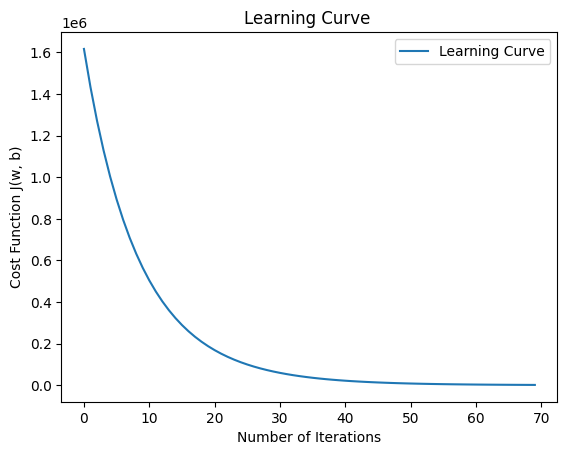

In [76]:
model.fit_data(np.array(X_train), np.array(y_train))

In [77]:
y_hat = model.predict(np.array(X_test))

In [78]:
error = y_hat - y_test
error

,Target
83,-2.157289
53,-23.352477
70,-0.666436
45,72.715844
44,-3.397682
39,31.911883
22,31.508684
80,105.288459
10,-4.917185
0,62.854703


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 2776.12
R^2 Score: 1.00


### Testing the Linear Regression model from sklearn

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.24
R^2 Score: 1.00
